### 과제 0826
- iris 데이터셋 (100개행만 --> 이진분류)
- 품종 분류 (예측까지)
- 학습용, 테스트용 데이터셋 분리
- 테스트용 데이터셋으로 검증까지

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
iris = load_iris()
iris_data = iris.data			# ndarray

In [ ]:
# 안에 클래스?? 메소드?? 확인??
iris

In [5]:
type(iris_data)

numpy.ndarray

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# ndarray -> DF
irisDF = pd.DataFrame(data=iris_data, columns=iris.feature_names)
irisDF['label'] = iris.target

In [11]:
irisDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
total_DF = irisDF.iloc[:100].copy()

##### 피쳐&타겟
- 상관계수 확인

In [12]:
irisDF.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


In [15]:
total_DF.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
label,0.728290,-0.690684,0.969990,0.960307,1.000000


#### 피쳐 & 타겟 선언
- petal length
- petal width

In [16]:
feature = total_DF[ ['petal length (cm)', 'petal width (cm)']]
target = total_DF['label']

print(f'features => {feature.shape}, {feature.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (100, 2), 2D
target => (100,), 1D


#### 학습용/테스트용 데이터셋 준비

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# train : test = 80:20	==>		test_size = 0.2 or train_size = 0.8
# stratify --> 분류일 때만 사용, 분류 타겟의 종류 비율 고려
X_train, X_test, Y_train, Y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    stratify=target, 
                                                    random_state=10)

In [19]:
print(f'X_train => {X_train.shape}, {X_train.ndim}D')
print(f'Y_train => {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test => {X_test.shape}, {X_test.ndim}D')
print(f'Y_test => {Y_test.shape}, {Y_test.ndim}D')

X_train => (80, 2), 2D
Y_train => (80,), 1D
X_test => (20, 2), 2D
Y_test => (20,), 1D


##### target 0(), 1() 비율 확인
- test dataset
- train dataset 비교!!

In [22]:
print(f'Train Setosa ratio:	{Y_train.value_counts()[0]/Y_train.shape[0]}')
print(f'Train versicolor ratio:	{Y_train.value_counts()[1]/Y_train.shape[0]}')

Train Setosa ratio:	0.5
Train versicolor ratio:	0.5


In [23]:
print(f'Test Setosa ratio:	{Y_test.value_counts()[0]/Y_test.shape[0]}')
print(f'Test versicolor ratio:	{Y_test.value_counts()[1]/Y_test.shape[0]}')

Test Setosa ratio:	0.5
Test versicolor ratio:	0.5


#### 학습/훈련

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# 모델 인스턴스 생성
model= KNeighborsClassifier()
print(model.n_neighbors)

5


In [50]:
model = KNeighborsClassifier(n_neighbors=8)

In [51]:
# 학습 진행 w/ train_dataset
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

#### 모델 성능평가

In [52]:
model.score(X_test, Y_test)

1.0

#### 예측하기

In [53]:
new_data =pd.DataFrame( [ [1.4, 0.2]], columns=model.feature_names_in_ )
model.predict(new_data)

array([0])

#### 최근접한 K개 데이터 찾기

In [54]:
dist, idx = model.kneighbors(new_data)
print(dist)
print()
print(idx)

[[0.  0.  0.  0.  0.1 0.1 0.1 0.1]]

[[46 22 68 18 16 52 34 40]]


In [55]:
neighbors = idx.reshape(-1).tolist()
print(neighbors)

[46, 22, 68, 18, 16, 52, 34, 40]


In [56]:
total_DF.iloc[neighbors]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
46,5.1,3.8,1.6,0.2,0
22,4.6,3.6,1.0,0.2,0
68,6.2,2.2,4.5,1.5,1
18,5.7,3.8,1.7,0.3,0
16,5.4,3.9,1.3,0.4,0
52,6.9,3.1,4.9,1.5,1
34,4.9,3.1,1.5,0.2,0
40,5.0,3.5,1.3,0.3,0


#### 시각화

In [57]:
import matplotlib.pyplot as plt

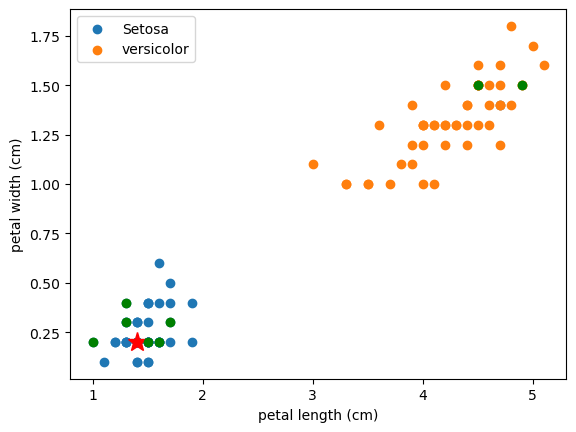

In [58]:
plt.scatter(total_DF.loc[:50,'petal length (cm)'], total_DF.loc[:50,'petal width (cm)'],
            label='Setosa')
plt.scatter(total_DF.loc[50:,'petal length (cm)'], total_DF.loc[50:,'petal width (cm)'],
            label='versicolor')
plt.plot(new_data['petal length (cm)'], new_data['petal width (cm)'], 'r*', markersize=14)		# 새로운 데이터 입력
plt.plot(total_DF.loc[neighbors,'petal length (cm)'], total_DF.loc[neighbors,'petal width (cm)'], 
         'go')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()